<a href="https://colab.research.google.com/github/Zhuma5002/Robotics-estimation-and-learning/blob/main/Zhumagali_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset ***import***

In [1]:
from google.colab import files
files.upload()  # A window for downloading a file will open.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhumagaliamangaliev","key":"cad5186f108ae6dd650ea3ae9c83b989"}'}

 Kaggle API в Google Colab

In [2]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d niteshfre/chessman-image-dataset


Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [75]:
import zipfile

dataset_zip = "chessman-image-dataset.zip"  # Name of the downloaded archive
extract_path = "/content/dataset"  # Where to unpack

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ The dataset has been successfully unpacked in:", extract_path)


✅ The dataset has been successfully unpacked in: /content/dataset


In [76]:
import os

print("List of files and folders in the dataset:")
print(os.listdir(extract_path))


List of files and folders in the dataset:
['Chessman-image-dataset']


In [77]:
import os

dataset_path = "/content/dataset/Chessman-image-dataset"
print("Files and folders in Chessman-image-dataset:", os.listdir(dataset_path))


Files and folders in Chessman-image-dataset: ['Chess']


In [12]:
path1 = "/content/dataset/Chessman-image-dataset/Chess"


In [78]:
print("Pieces in Chess:", os.listdir(path1))


Pieces in Chess: ['Queen', 'King', 'Rook', 'Bishop', 'Pawn', 'Knight']


In [82]:
import os

dataset_path = "/content/dataset/Chessman-image-dataset/Chess"

# Remove all GIF files from the dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    for file in os.listdir(category_path):
        if file.endswith(".gif"):
            os.remove(os.path.join(category_path, file))
            print(f"🗑 Removed: {file}")

print("✅ All GIFs have been removed.!")

✅ All GIFs have been removed.!


Loading images into an array

In [81]:
import cv2
import numpy as np
import os
import random

# Folder with figures
path1 = "/content/dataset/Chessman-image-dataset/Chess"
categ = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Image size
img_size = 256
df = []

# Uploading images
for i in categ:
    path2 = os.path.join(path1, i)
    cls_name = categ.index(i)  # Class number
    for img in os.listdir(path2):
        img_path = os.path.join(path2, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as cv
        if img_array is None:
            print(f"❌ Loading error: {img_path}")
            continue
        img_array = cv2.resize(img_array, (256, 256))  # Change the size
        img_array = np.stack((img_array,) * 3, axis=-1)  # We make 3 channels (R, G, B are the same)
        df.append([img_array, cls_name])  # Add to array

random.shuffle(df)  # Shuffle the dataset
print("✅ Data loaded:", len(df), "images")



✅ Data loaded: 555 images


class: 2, size of image: (256, 256, 3)


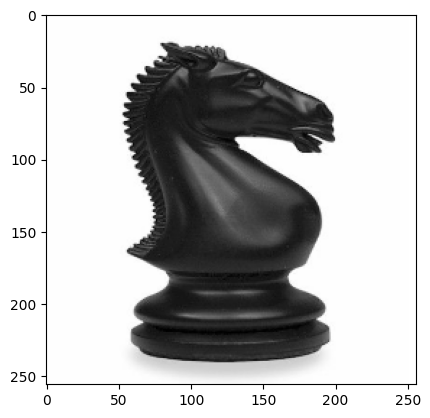

class: 1, size of image: (256, 256, 3)


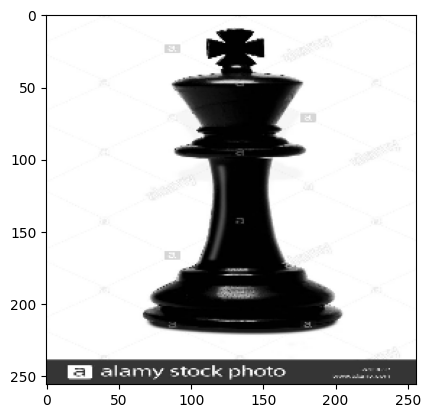

class: 3, size of image: (256, 256, 3)


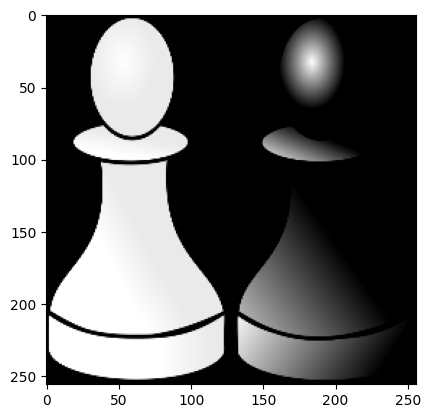

class: 5, size of image: (256, 256, 3)


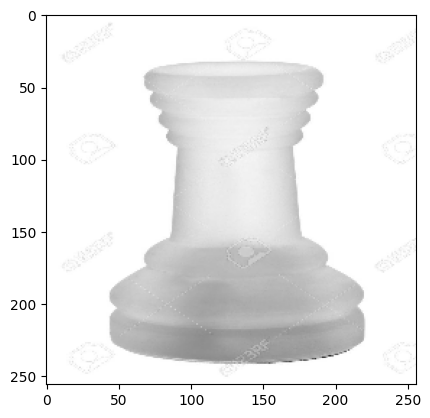

class: 1, size of image: (256, 256, 3)


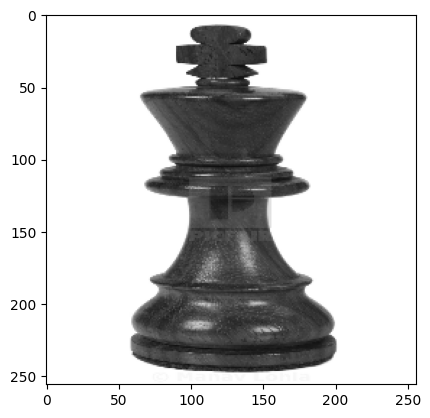

In [83]:
import matplotlib.pyplot as plt

for i in range(5):
    print(f"class: {df[i][1]}, size of image: {df[i][0].shape}")
    plt.imshow(df[i][0])  # show image
    plt.show()


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# creating model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 class of figures
])

# copy model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("✅ model is created!")


✅ model is created!


Train model

In [91]:
from collections import Counter

labels = [label for _, label in df]
class_counts = Counter(labels)

for i, count in class_counts.items():
    print(f"{categ[i]}: {count} images")


Knight: 106 images
King: 76 images
Pawn: 107 images
Rook: 102 images
Queen: 78 images
Bishop: 86 images


In [89]:
from collections import Counter

counts = Counter(y_train)
print("Number of images in each class:", counts)


Number of images in each class: Counter({3: 86, 2: 84, 5: 77, 0: 67, 4: 67, 1: 63})


Add augmentation (artificial data augmentation)

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,     # Turns of ±20 degrees
    width_shift_range=0.2, # Width offset
    height_shift_range=0.2,# Height offset
    shear_range=0.2,       # Distortion
    zoom_range=0.2,        # zoom
    horizontal_flip=True,  # Reflection horizontally
    fill_mode='nearest'    # Filling pixels on shifts
)

#apply augmentation
datagen.fit(X_train)


In [68]:
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.1841 - loss: 9.4147 - val_accuracy: 0.2252 - val_loss: 1.7702
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.1930 - loss: 1.7913 - val_accuracy: 0.1532 - val_loss: 1.7926
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.2031 - loss: 1.7912 - val_accuracy: 0.1892 - val_loss: 1.7914
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.2345 - loss: 1.7879 - val_accuracy: 0.1892 - val_loss: 1.7905
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.2076 - loss: 1.7896 - val_accuracy: 0.1982 - val_loss: 1.8181
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.2413 - loss: 1.7837 - val_accuracy: 0.1802 - val_loss: 1.8097
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.2420 - loss: 1.7703 - val_accuracy: 0.1532 - val_loss: 1.8188
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.2443 - loss: 1.7567 - val_accuracy: 0.1532 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


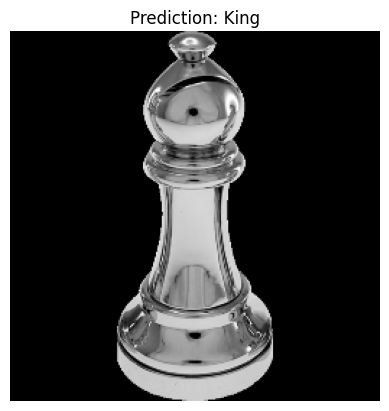

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Select a random image
idx = random.randint(0, len(X_test) - 1)
img = X_test[idx]

# Check how many channels the model expects
input_shape = model.input_shape  # Expected format (None, 256, 256, ?)
expected_channels = input_shape[-1]  # Number of channels (1 or 3)
# We will convert the image to the required format
if img.shape[-1] != expected_channels:
    if expected_channels == 1:
        img = img[..., 0]  # We take only one channel
        img = np.expand_dims(img, axis=-1)  # Add back 1 channel
    elif expected_channels == 3:
        img = np.stack([img[..., 0]] * 3, axis=-1)  # Duplicate channels to RGB

# make a prediction
pred = model.predict(np.expand_dims(img, axis=0))
pred_label = np.argmax(pred)

# show an image
plt.imshow(img.reshape(img_size, img_size), cmap="gray" if expected_channels == 1 else None)
plt.title(f"Prediction: {categ[pred_label]}")
plt.axis("off")
plt.show()
